In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import torch
import torch.nn as nn

In [2]:
class Dump(nn.Module):
    def __init__(self):
        super(Dump, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(1, 100, bias=False),
            nn.ReLU(),
            nn.Linear(100, 1, bias=False),
        )

        # set manual weight
        with torch.no_grad():
        #         nn.init.xavier_uniform_(self.fc[0].weight)
        #         nn.init.xavier_uniform_(self.fc[-1].weight)
        #         nn.init.kaiming_uniform_(self.fc[0].weight)
        #         nn.init.kaiming_uniform_(self.fc[-1].weight)
            self.fc[0].weight.fill_(1)
            self.fc[-1].weight.fill_(1)

    def forward(self, x):
        return nn.Identity()(self.fc(x))

In [3]:
# define optimizers
optimizers = {
    'sgd': torch.optim.SGD,
    'adagrad': torch.optim.Adagrad,
    'rmsprop': torch.optim.RMSprop,
    'adam': torch.optim.Adam,
    'adam_w': torch.optim.AdamW
}

In [4]:
input_ = torch.ones(1)
zero_ = torch.zeros(1)
# zero_ = torch.tensor([5e-3])
loss_fn = torch.nn.MSELoss()

In [5]:
def simulate_training(model, optim, epochs):
    
    lr = 1e-3
    optim_ = optimizers[optim](model.parameters(), lr=lr)
    model.train()

    for i in range(epochs):

        optim_.zero_grad()

        output_ = model(input_)
        loss_ = loss_fn(output_, zero_)

        losses[optim].append(loss_.item())

        # compute gradients
        loss_.backward()
        # step optimizer
        optim_.step()

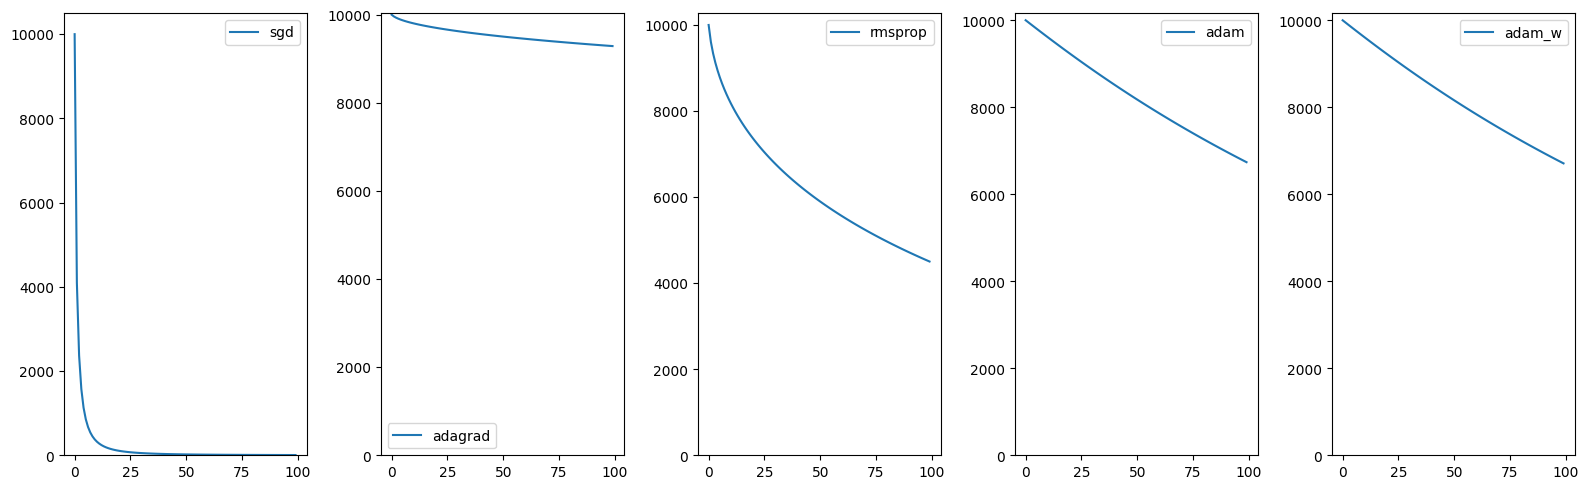

In [6]:
model = Dump()

epochs = 100

losses = {
    'sgd':[],
    'adagrad':[],
    'rmsprop':[],
    'adam':[],
    'adam_w':[],
}


for k in losses.keys():
    m_ = Dump()
    m_.load_state_dict(model.state_dict())
    simulate_training(m_, k, epochs)

fig, ax = plt.subplots(1, len(losses), figsize=(16,5))
for k, a in zip(losses.keys(), ax):
    sns.lineplot(x=range(epochs), y=losses[k], label=k, ax=a)
    a.set_ylim(0)
    
plt.tight_layout()
plt.show()

In [8]:
# pd.DataFrame(losses)

## Example

In [16]:
exp_ = range(0, 6)
time_ = range(0, 6)
salary_ = [t*5 + 30 for t in time_]

In [17]:
salary_

[30, 35, 40, 45, 50, 55]

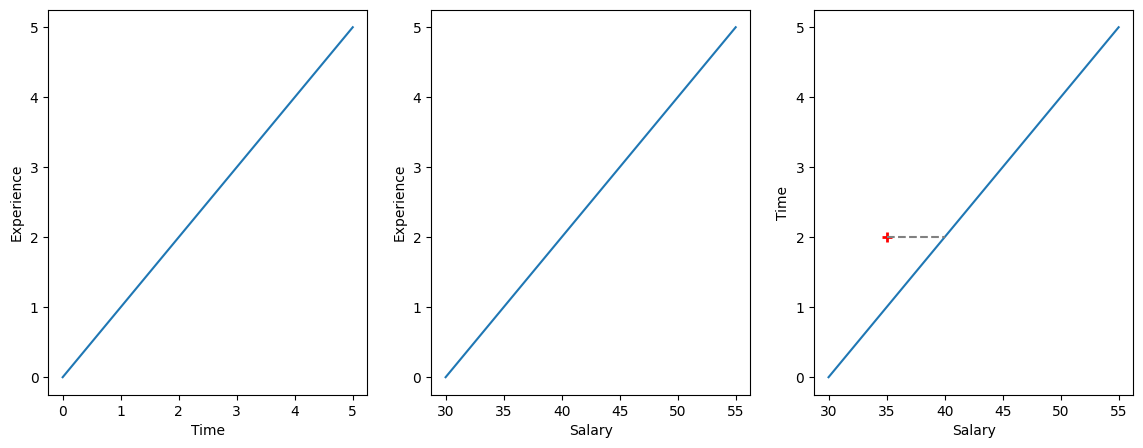

In [33]:
fig, ax = plt.subplots(1, 3, figsize=(14, 5))

sns.lineplot(x=time_, y=exp_, ax=ax[0])
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Experience')

sns.lineplot(x=salary_, y=exp_, ax=ax[1])
ax[1].set_xlabel('Salary')
ax[1].set_ylabel('Experience')


sns.lineplot(x=salary_, y=time_, ax=ax[2])
ax[2].set_xlabel('Salary')
ax[2].set_ylabel('Time')

sns.lineplot(x=[35, 40], y=[2, 2], ax=ax[2], linestyle='--', color='gray')
sns.scatterplot(x=[35], y=[2], ax=ax[2], s=60, linewidth=2, marker='+', color='red')

plt.show()